In [1]:
import tensorflow as tf
import numpy as np
import pickle
from scipy.signal import lfilter
import matplotlib.pyplot as plt 

/opt/anaconda/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with open('Analysis-CIFAR10.pkl','rb') as f:
    [store_err_bp,store_err_fa,acc_fa,acc_bp,testing_fa,testing_bp]=pickle.load(f)

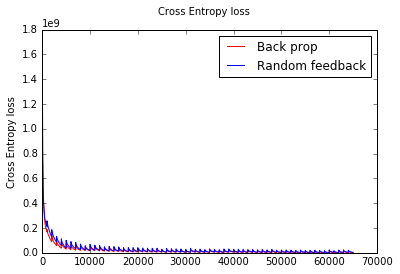

In [3]:
plt.plot(store_err_bp,'r',label='Back prop')
plt.plot(store_err_fa,'b',label='Random feedback')
plt.suptitle('Cross Entropy loss')
plt.ylabel('Cross Entropy loss')
plt.legend()
plt.show()

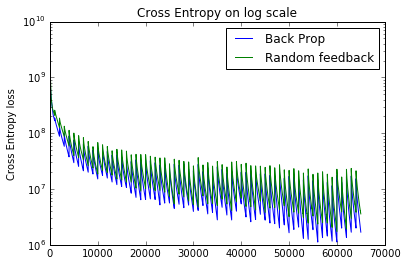

In [4]:
plt.semilogy(store_err_bp,label='Back Prop')
plt.semilogy(store_err_fa,label='Random feedback')
plt.title('Cross Entropy on log scale')
plt.ylabel('Cross Entropy loss')
plt.legend()
plt.show()

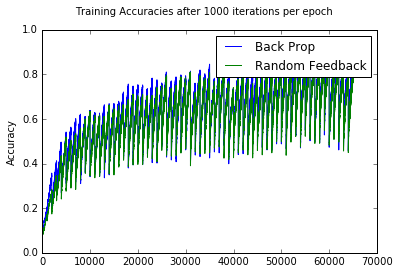

In [9]:
plt.plot(acc_bp,label='Back Prop')
plt.plot(acc_fa,label='Random Feedback')
plt.ylabel('Accuracy')
plt.suptitle("Training Accuracies after 1000 iterations per epoch")
plt.legend()
plt.show()

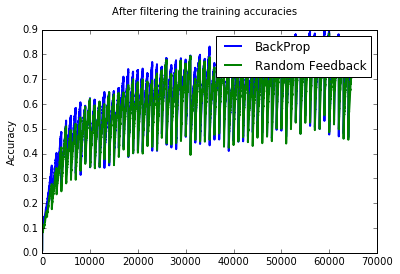

In [10]:
n = 10 # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy_bp = lfilter(b,a,acc_bp)
yy_fa = lfilter(b,a,acc_fa)

plt.plot( yy_bp, linewidth=2, linestyle="-", c="b",label='BackProp')

plt.plot( yy_fa, linewidth=2, linestyle="-", c="g",label='Random Feedback')
plt.suptitle('After filtering the training accuracies')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

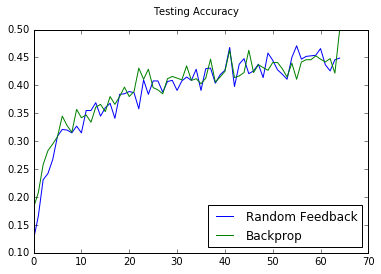

In [11]:
plt.plot(testing_fa,label='Random Feedback')
plt.plot(testing_bp,label='Backprop')
plt.suptitle('Testing Accuracy')
plt.legend(loc='lower right')
plt.show()